# Principal Component Analysis in scikit-learn - Lab

## Introduction

Now that you've seen a brief introduction to PCA, it's time to use scikit-learn to run PCA on your own. 

## Objectives

In this lab you will: 

- Implement PCA using the scikit-learn library 
- Determine the optimal number of n components when performing PCA by observing the explained variance 
- Plot the decision boundary of classification experiments to visually inspect their performance 

## Iris dataset

To practice PCA, you'll take a look at the iris dataset. Run the cell below to load it. 

In [1]:
from sklearn import datasets
import pandas as pd
 
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Target'] = iris.get('target')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
df['Target']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Target, Length: 150, dtype: int32

Before performing PCA and visualizing the principal components, it's helpful to get a little more context regarding the data that you'll be working with. Run the cell below in order to visualize the pairwise feature plots. With this, notice how the target labels are easily separable by any one of the given features.

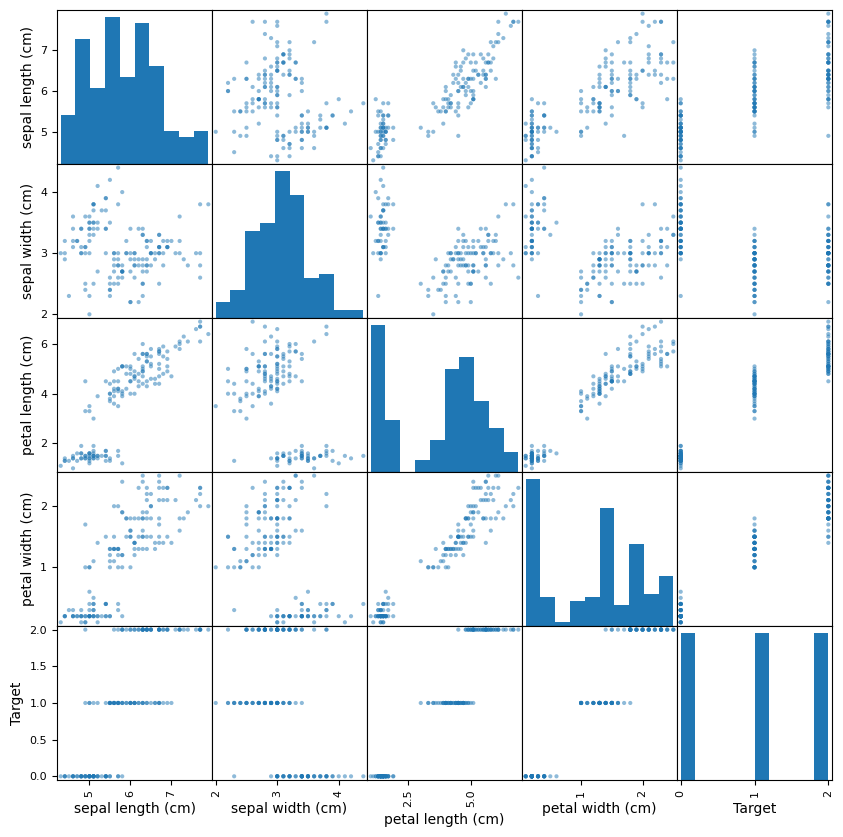

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

pd.plotting.scatter_matrix(df, figsize=(10,10));

- Assign all columns in the following `features` list to `X` 
- Assign the `'Target'` column to `y` 

In [8]:
# Create features and target datasets
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = df[features]
y = df['Target']

In [10]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Target, Length: 150, dtype: int32

Standardize all the columns in `X` using `StandardScaler`. 

In [12]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler
#initialize the scaler
scaler = StandardScaler()

# Standardize the features
X = scaler.fit_transform(X)

# Preview X
pd.DataFrame(data=X, columns=features).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


## PCA Projection to 2-D Space

Now its time to perform PCA! Project the original data which is 4 dimensional into 2 dimensions. The new components are just the two main dimensions of variance present in the data.

- Initialize an instance of PCA from scikit-learn with two components
- Fit the data to the model
- Extract the first two principal components from the trained model 

In [13]:
# Import PCA
from sklearn.decomposition import PCA

# Instantiate PCA
pca = PCA(n_components = 2)

# Fit PCA
principalComponents = pca.fit_transform(X)

To visualize the components, it will be useful to also look at the target associated with the particular observation. 
As such, append the target (flower type) to the principal components in a pandas dataframe.

In [16]:
# Create a new dataset from principal components 
import pandas as pd
#create a dataframe with the principal components
pca_df = pd.DataFrame(principalComponents,columns=['PC1','PC2'])
#add the target (flower type) to the dataframe
pca_df['Target'] = y.values
#display output
pca_df.head()


,PC1,PC2,Target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


Great, you now have a set of two dimensions, reduced from four against our target variable, the flower type. 

## Visualize Principal Components 

Using the target data, we can visualize the principal components according to the class distribution. 
- Create a scatter plot from principal components while color coding the examples according to what flower type each example is classified as

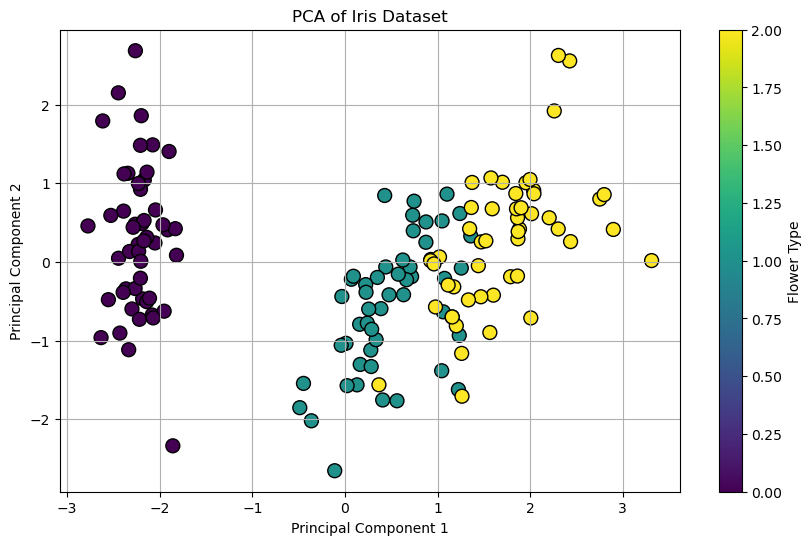

In [17]:
# Principal Components scatter plot
# Your code here 
#scatter plot
plt.figure(figsize=(10,6))
scatter = plt.scatter(pca_df['PC1'],pca_df['PC2'],c= pca_df['Target'],cmap='viridis',edgecolors='k',s=100)
#Add legend and labels
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter,label = 'Flower Type')
plt.grid()
plt.show()


## Explained Variance


You can see above that the three classes in the dataset are fairly well separable. As such, this compressed representation of the data is probably sufficient for the classification task at hand. Compare the variance in the overall dataset to what was captured from your two primary components.

In [18]:
#calculate the variance explained by each principal component
variance_explained = pca.explained_variance_ratio_
#calculate the total variance explained by the two components
total_variance_expalined = variance_explained.sum()
# Calculate the variance explained by principal components
print('Variance of each component:', variance_explained)
print('\n Total Variance Explained:', total_variance_expalined)

Variance of each component: [0.72962445 0.22850762]

 Total Variance Explained: 0.9581320720000164


As you should see, these first two principal components account for the vast majority of the overall variance in the dataset. This is indicative of the total information encapsulated in the compressed representation compared to the original encoding.

## Compare Performance of a Classifier with PCA

Since the principal components explain 95% of the variance in the data, it is interesting to consider how a classifier trained on the compressed version would compare to one trained on the original dataset.

- Run a `KNeighborsClassifier` to classify the Iris dataset 
- Use a train/test split of 80/20
- For the reproducibility of results, set `random_state=9` for the split
- Time the process for splitting, training and making predictions

In [20]:
# Classification - complete Iris dataset

# Your code here 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

#load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

#Train/test split(80/20)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 9)
#timing the process for the original dataset
start_time = time.time()
#Initialize and train the classifier on the dataset
knn = KNeighborsClassifier()
#fit on training data
knn.fit(X_train,y_train)
#make predictions on the test set
y_pred = knn.predict(X_test)
#timing complete
end_time = time.time()
time_original = end_time - start_time
#calculate accuracy for the original dataset
accuracy_score = accuracy_score(y_test,y_pred)
# Output time taken and accuracy for the original dataset
print(f"Time taken for KNN with original dataset: {time_original:.4f} seconds")
print(f"Accuracy for KNN with original dataset: {accuracy_score:.4f}")



Time taken for KNN with original dataset: 0.0132 seconds
Accuracy for KNN with original dataset: 1.0000


Great, so you can see that we are able to classify the data with 100% accuracy in the given time. Remember the time taken may be different based on the load on your CPU and number of processes running on your machine. 

Now repeat the above process for the dataset made from principal components: 

- Run a `KNeighborsClassifier` to classify the Iris dataset with principal components
- Use a train/test split of 80/20
- For the reproducibility of results, set `random_state=9` for the split
- Time the process for splitting, training and making predictions

In [26]:
import numpy as np
from sklearn.metrics import accuracy_score
# Classification - reduced (PCA) Iris dataset
pca = PCA(n_components=2)
#splitting the data
X_train,X_test,y_train,y_pred = train_test_split(X,y,test_size=0.2,random_state=9)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
#timing the process for the PCA compressed data
start_time = time.time()
#Initialize and train the KNN on the pca data
knn_pca = KNeighborsClassifier()
#fit on the training data
knn_pca.fit(X_train_pca,y_train)
#make predictions
y_pred_pca = knn_pca.predict(X_test_pca)
#timing complete
end_time=time.time()
time_pca = end_time - start_time
#calculate accuracy of the PCA dataset
accuracy_pca = accuracy_score(y_test,y_pred_pca)
# Output time taken and accuracy for the PCA dataset
print(f"Time taken for KNN with PCA dataset: {time_pca:.4f} seconds")
print(f"Accuracy for KNN with PCA dataset: {accuracy_pca:.4f}")




Time taken for KNN with PCA dataset: 0.0108 seconds
Accuracy for KNN with PCA dataset: 1.0000


Although some accuracy is lost in this representation of the data, we were able to use half of the number of features to train the model!

In more complex cases, PCA can even improve the accuracy of some machine learning tasks. In particular, PCA can be useful to reduce overfitting.

## Visualize the Learned Decision Boundary 

Run the cell below to visualize the decision boundary learned by the k-nearest neighbor classification model trained using the principal components of the data. 

In [ ]:
# Plot decision boundary using principal components 
import numpy as np 
def decision_boundary(pred_func):
    
    # Set the boundary
    x_min, x_max = X.iloc[:, 0].min() - 0.5, X.iloc[:, 0].max() + 0.5
    y_min, y_max = X.iloc[:, 1].min() - 0.5, X.iloc[:, 1].max() + 0.5
    h = 0.01
    
    # Build meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour
    plt.figure(figsize=(15,10))
    plt.contourf(xx, yy, Z, cmap=plt.cm.afmhot)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Spectral, marker='x')

decision_boundary(lambda x: model.predict(x))

plt.title('decision boundary');

## Summary 

In this lab, you applied PCA to the popular Iris dataset. You looked at the performance of a simple classifier and the impact of PCA on the accuracy of the model and the time it took to run the model. From here, you'll continue to explore PCA at more fundamental levels.